In [ ]:
from tensorflow.keras import backend as K
K.clear_session()
!pip install rarfile
import os
import pandas as pd
import gdown
import rarfile
import shutil
from PIL import Image

#https://drive.google.com/file/d/1O0_qr4yHPDp_O36wS59mVvyYiX3c9pYk/view?usp=drive_link



url = 'https://drive.google.com/uc?id=1O0_qr4yHPDp_O36wS59mVvyYiX3c9pYk'
output_rar = '/content/SDR.rar'
gdown.download(url, output_rar, quiet=False)
# Extract the RAR file
with rarfile.RarFile(output_rar, 'r') as rar_ref:
    rar_ref.extractall('/content')
# Path to the extracted dataset folder
dataset_folder = '/content/SDR'

Downloading...
From (original): https://drive.google.com/uc?id=1O0_qr4yHPDp_O36wS59mVvyYiX3c9pYk
From (redirected): https://drive.google.com/uc?id=1O0_qr4yHPDp_O36wS59mVvyYiX3c9pYk&confirm=t&uuid=ddc2f0c7-ff41-4f01-894d-51ef248bf03d
To: /content/SDR.rar
100%|██████████| 231M/231M [00:04<00:00, 49.7MB/s]


EfficientNetV2

In [ ]:
from keras.applications import EfficientNetV2B0
from keras.models import Model
from keras.layers import Input, Dense, GlobalAveragePooling2D
from keras.optimizers import Adam

def efficientnetv2_model():
    inputs = Input(shape=(224, 224, 3))

    # Load EfficientNetV2 base (without the top classification layers)
    base_model = EfficientNetV2B0(include_top=False, input_tensor=inputs, weights='imagenet')

    # Freeze the base model if you want to fine-tune later
    # for layer in base_model.layers:
    #     layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)  # instead of Flatten
    outputs = Dense(5, activation='softmax')(x)  # 5 classes like your ResNet50

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    return model

model = efficientnetv2_model()
model.summary()


24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              0 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_conv      │ (None, 112, 112, 16)   │          4,608 │ stem_activation[0][0]  │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_bn        │ (None, 112, 112, 16)   │             64 │ block1a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_activati… │ (None, 112, 112, 16)   │              0 │ block1a_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_conv       │ (None, 56, 56, 64)     │          9,216 │ block1a_project_activ… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_bn         │ (None, 56, 56, 64)     │            256 │ block2a_expand_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_activation │ (None, 56, 56, 64)     │              0 │ block2a_expand_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_project_conv      │ (None, 56, 56, 32)     │          2,048 │ block2a_expand_activa… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_project_bn        │ (None, 56, 56, 32)     │            128 │ block2a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 5,925,717 (22.60 MB)

 Trainable params: 5,865,109 (22.37 MB)

 Non-trainable params: 60,608 (236.75 KB)

Found 2674 images belonging to 3 classes.
Found 666 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 586ms/step - accuracy: 0.6926 - loss: 0.6659
Epoch 1: val_accuracy improved from -inf to 0.68619, saving model to /content/Split/Save/best_model.keras
84/84 ━━━━━━━━━━━━━━━━━━━━ 154s 771ms/step - accuracy: 0.6932 - loss: 0.6649 - val_accuracy: 0.6862 - val_loss: 0.7949
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8081 - loss: 0.4371
Epoch 2: val_accuracy did not improve from 0.68619
84/84 ━━━━━━━━━━━━━━━━━━━━ 47s 151ms/step - accuracy: 0.8082 - loss: 0.4371 - val_accuracy: 0.4730 - val_loss: 1.1896
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.8290 - loss: 0.3893
Epoch 3: val_accuracy did not improve from 0.68619
84/84 ━━━━━━━━━━━━━━━━━━━━ 15s 182ms/step - accuracy: 0.8292 - loss: 0.3890 - val_accuracy: 0.4640 - val_loss: 0.9660
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.8940 - loss: 0.2718
Epoch 4: val_accuracy did not improve from 0.68619
84/84 ━━━━━━━━━━━━━━━━━━━━ 13s 151ms/step 

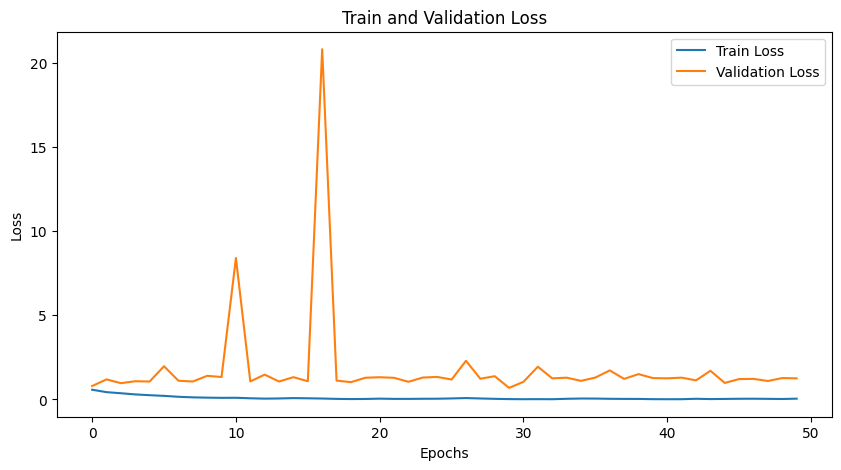

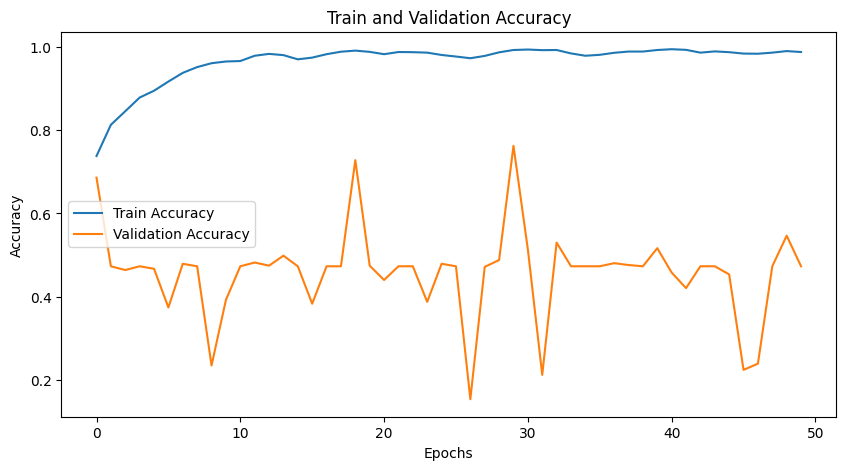

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Settings
data_dir = '/content/Gradding 3C/Train'
class_names = ['Healthy', 'Mild-to-Moderate', 'Severe-to-Proleferative']
img_size = (224, 224)
batch_size = 32
epochs = 50

# Image Data Generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

validation_data_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='validation'
)

# Define the model using EfficientNetV2B0
def build_model(input_shape=(224, 224, 3), num_classes=3):
    inputs = Input(shape=input_shape)
    base_model = EfficientNetV2B0(include_top=False, input_tensor=inputs, weights='imagenet')

    # You can freeze the base model if you want faster training
    # for layer in base_model.layers:
    #     layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Build and compile the model
model = build_model(input_shape=(224, 224, 3), num_classes=len(class_names))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define ModelCheckpoint to save the best model
best_weights_path = '/content/Split/Save/best_model.keras'
checkpoint = ModelCheckpoint(
    best_weights_path,
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

# Train the model
history = model.fit(
    train_data_generator,
    epochs=epochs,
    validation_data=validation_data_generator,
    verbose=1,
    callbacks=[checkpoint]
)

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Validation Loss')
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train and Validation Accuracy')
plt.show()


In [ ]:
import os
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

 #Load the model architecture first
#(Important if the model is not in memory)
from tensorflow.keras.models import load_model

# Settings
best_weights_path = '/content/Split/Save/best_model.keras'
test_dir = '/content/Gradding 3C/Test'
img_size = (224, 224)
batch_size = 32

# Rebuild the model architecture before loading weights
# (Make sure to define the model same way as trained if needed)
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetV2B0

def build_model(input_shape=(224, 224, 3), num_classes=3):
    inputs = Input(shape=input_shape)
    base_model = EfficientNetV2B0(include_top=False, input_tensor=inputs, weights='imagenet')
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

model = build_model(input_shape=(224, 224, 3), num_classes=3)
model.load_weights(best_weights_path)
print("Loaded best model weights successfully!")

# Prepare test data
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_data_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Predict
y_true = test_data_generator.classes
y_pred_probs = model.predict(test_data_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Loaded best model weights successfully!
Found 838 images belonging to 3 classes.
27/27 ━━━━━━━━━━━━━━━━━━━━ 16s 368ms/step
Test Accuracy: 0.7375
Test Precision: 0.7764
Test Recall: 0.7375
Test F1-score: 0.7400
Confusion Matrix:
[[376   5  14]
 [ 35 158 120]
 [  8  38  84]]
